# Play with date_utils

This notebook demonstrates some of the utilities in [date_utils.py](date_utils.py). 

Let us start by importing date_utils.

In [1]:
import date_utils
import matplotlib as plt
import pandas as pd

%matplotlib inline

## Conversion Utilities
There are some simple conversion routines to go from a string to a date and a date back to a string.

What is today's date, you ask?

In [2]:
date_utils.today2str()

'2019-01-30'

Oh, you wanted the datetime object? I see...

In [3]:
date_utils.str2date(date_utils.today2str())

datetime.date(2019, 1, 30)


## Data Frame Utilities
In addition to conversion routines, there are also utilities to handle a pandas.DataFrame. This will be the format we use for handling the weights. A pandas.DataFrame indexed by days of the year.

To create a weights file, use the `write_weights_file` function. This is how [2019_weights.csv](2019_weights.csv) was generated.

To read the weights file, use `read_weighs_file`.

In [4]:
act_df = date_utils.read_weights_file('2019_weights.csv')

In [5]:
act_df.head()

,act_weight
2019-01-01,184.0
2019-01-02,183.4
2019-01-03,181.2
2019-01-04,179.8
2019-01-05,180.4


To select a range of dates to focus on, use the `select_by_date` function.

In [6]:
jan_act_df = date_utils.select_by_date(act_df,'2019-01-01','2019-01-30')
jan_act_df.head()

,act_weight
2019-01-01,184.0
2019-01-02,183.4
2019-01-03,181.2
2019-01-04,179.8
2019-01-05,180.4


Now read the goal weights from the [2019_goal_weights.csv](2019_goal_weights.csv) file. In order to write one of these files, use the `write_goal_file` function.

In [7]:
goal_df = date_utils.read_goal_file('2019_goal_weights.csv')
goal_df.head()

,goal_weight
2019-01-01,180
2019-01-02,180
2019-01-03,180
2019-01-04,180
2019-01-05,180


Select January for the goal weights

In [8]:
jan_goal_df = date_utils.select_by_date(goal_df, '2019-01-01','2019-01-30')
jan_goal_df.head()

,goal_weight
2019-01-01,180
2019-01-02,180
2019-01-03,180
2019-01-04,180
2019-01-05,180


Now join the two data frames.

In [9]:
jan_weights = jan_act_df.join(jan_goal_df)
jan_weights.head()

,act_weight,goal_weight
2019-01-01,184.0,180
2019-01-02,183.4,180
2019-01-03,181.2,180
2019-01-04,179.8,180
2019-01-05,180.4,180


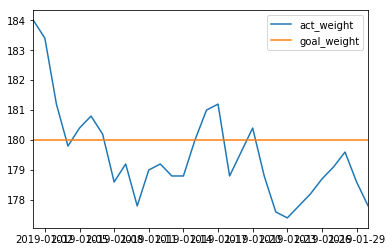

In [10]:
jan_weights.plot()

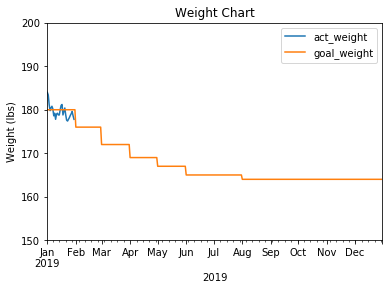

In [14]:
all_weights = act_df.join(goal_df)
ax = all_weights.plot()
ax.set_title('Weight Chart')
ax.set_xlabel('2019')
ax.set_ylabel('Weight (lbs)')
ax.set_ylim(150, 200)
plt.pyplot.savefig('year_so_far.png')

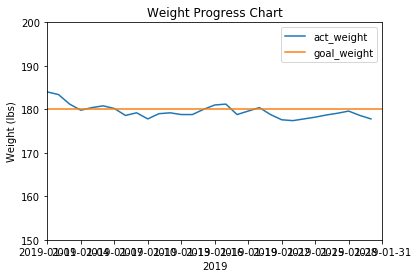

In [12]:
date_utils.save_weight_progress_for_month('jan_so_far.png', 1)